### Analyse market.txt data and check the factor influencing subscriotion, prove it with suitable statistical test with evidence
 a. check income influencing subscription? t test
 
 b. check kids influencing subscripion? chi sq test
 
 c. check if gender influencing subscription? z test
 
 d. if age influences subsciption?  2 samp ttest
 
 e. Segment influences subscription? ci sq
 
 f. home ownners influence subscription? z test

In [60]:
#python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp,ttest_ind, wilcoxon, shapiro, levene, f_oneway, mannwhitneyu, bartlett
from statsmodels.stats.power import ttest_power
import scipy.stats as stats
# another way to import "from scipy.stats import norm" no prefix needed
from scipy.stats import chisquare , chi2_contingency
from statsmodels.stats.power import ttest_power
import scipy.stats as stats

In [4]:
pwd C:\Users\ASUS\Desktop\great learning\week3

'C:\\Users\\ASUS\\Desktop\\great learning\\week3'

In [5]:
A=pd.read_table('Market.txt', index_col=0)

In [6]:
A.head()

,age,gender,income,kids,Home,Subscribe,Segment
Individuals,,,,,,,
Ind1,47,Male,49482.81044,2,No,No,Suburb mix
Ind2,31,Male,35546.28830,1,Yes,No,Suburb mix
Ind3,43,Male,44169.18638,0,Yes,No,Suburb mix
Ind4,37,Female,81041.98639,1,No,No,Suburb mix
Ind5,41,Female,79353.01444,3,Yes,No,Suburb mix


In [7]:
A["Subscribe"].value_counts()

No     260
Yes     40
Name: Subscribe, dtype: int64

In [9]:
A["gender"].value_counts()

Female    157
Male      143
Name: gender, dtype: int64

In [10]:
A["kids"].value_counts()

0    121
1     70
2     51
3     36
4     13
5      6
6      2
7      1
Name: kids, dtype: int64

In [11]:
A["Home"].value_counts()

No     159
Yes    141
Name: Home, dtype: int64

In [12]:
A["Segment"].value_counts()

Suburb mix    100
Travelers      80
Moving up      70
Urban hip      50
Name: Segment, dtype: int64

#### a. check income influencing subscription? t test


In [15]:
A["income"].describe()

count       300.000000
mean      50936.536184
std       20137.549431
min       -5183.354243
25%       39656.283625
50%       52014.352450
75%       61403.176265
max      114278.255600
Name: income, dtype: float64

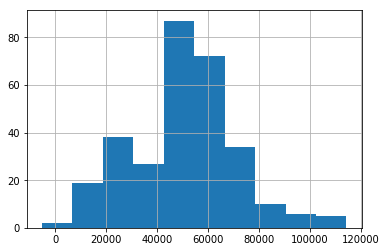

In [16]:
A['income'].hist(bins=10)

In [32]:
shapiro(A["income"])# not normal

(0.977647602558136, 0.00012440081627573818)

In [51]:
a1= A.groupby("Subscribe")

A_yes=a1.get_group("Yes")

A_no=a1.get_group("No")

In [52]:
shapiro(A_yes['income'])

(0.9477968811988831, 0.06370037794113159)

In [53]:
shapiro(A_no['income'])

(0.9781917929649353, 0.0005084113217890263)

yes group is diff from no group, so unpaired type, we ll perform mannwhitneyu

In [55]:
s1,p1= mannwhitneyu(A_yes['income'], A_no['income'])
p1

0.03109766879258763

In [58]:
s2,p2= bartlett(A_yes['income'], A_no['income'])
s2, p2

(0.7879412805420993, 0.3747233638590296)

In [62]:
s3, p3= ttest_ind(A_yes['income'], A_no['income'])
p3

0.09149242006282236

Here p>0.05 , so it fails to reject Ho. There is no sig diff in inc wrt income. mean value for yes and no are same. Hence, income doesnt influence subscription

In [63]:
A_yes["income"].describe()

count       40.000000
mean     45933.665183
std      18199.869750
min      12544.683710
25%      35155.310485
50%      49106.580315
75%      56145.024145
max      82076.829540
Name: income, dtype: float64

In [64]:
A_no["income"].describe()

count       260.000000
mean      51706.208645
std       20342.378451
min       -5183.354243
25%       40336.792483
50%       52731.065565
75%       62623.117735
max      114278.255600
Name: income, dtype: float64

### b. part

In [44]:
A["kids"].value_counts()

0    121
1     70
2     51
3     36
4     13
5      6
6      2
7      1
Name: kids, dtype: int64

In [ ]:
A["Subscribe"].value_counts()

In [46]:
C=pd.crosstab(A['kids'], A['Subscribe'])
C

Subscribe,No,Yes
kids,,
0,109,12
1,56,14
2,42,9
3,32,4
4,13,0
5,6,0
6,1,1
7,1,0


In [47]:
ch_val, p_val,nrow,EC=chi2_contingency(C)

In [48]:
ch_val

10.293136008376651

In [49]:
p_val

0.17256134562175204

In [50]:
EC

array([[104.86666667,  16.13333333],
       [ 60.66666667,   9.33333333],
       [ 44.2       ,   6.8       ],
       [ 31.2       ,   4.8       ],
       [ 11.26666667,   1.73333333],
       [  5.2       ,   0.8       ],
       [  1.73333333,   0.26666667],
       [  0.86666667,   0.13333333]])

P value is more than 0.05 so, we fail to reject the null hypothesis, which implies, proportion of kids wrt subscription. Subsription doesnt depends on No. of kids in a family.

### C. part

In [65]:
A["gender"].value_counts()

Female    157
Male      143
Name: gender, dtype: int64

In [70]:
B=pd.crosstab(A['Subscribe'], A['gender']) #contingency table
B

gender,Female,Male
Subscribe,,
No,136,124
Yes,21,19


In [71]:
x1= B.iloc[1,0] #yes
x2= B.iloc[1,1] #no
n1= B.iloc[:,0].sum()
n2= B.iloc[:, 1].sum()
n1, n2, x1, x2


(157, 143, 21, 19)

In [72]:

def twosampz(x1,x2,n1,n2):
    p1=x1/n1
    p2=x2/n2
    pp=(x1+x2)/(n1+n2)
    zdata=(p1-p2)/(np.sqrt(pp*(1-pp)*(1/n1 + 1/n2)))
    pval=2*(1-stats.norm.cdf(abs(zdata)))
    return round(zdata,3),pval

In [75]:
z,p= twosampz(x1,x2,n1,n2)
z,p

(0.023, 0.9819133151635278)

In [76]:
# high p value, so fail to reject Ho, proportion of male and female with subscription are similar

#### D part

In [77]:
a1= A.groupby("Subscribe")

A_yes=a1.get_group("Yes")

A_no=a1.get_group("No")

In [79]:
shapiro(A_yes["age"]) #not normal

(0.9249120950698853, 0.011027186177670956)

In [80]:
shapiro(A_no["age"]) #not normal

(0.9646013975143433, 5.050979325460503e-06)

In [81]:
bartlett(A_yes["age"],A_no["age"])
#high p value means variances of the groups are similar

BartlettResult(statistic=1.3682235103450975, pvalue=0.24211734382353628)

In [82]:
ttest_ind(A_yes["age"],A_no["age"])

Ttest_indResult(statistic=-0.8233757973693239, pvalue=0.41095275488058347)

High p value , so it fails to reject Ho, which implies that age doesnt influence the subscription

### E part

In [84]:
E= pd.crosstab(A["Subscribe"], A["Segment"])
E

Segment,Moving up,Suburb mix,Travelers,Urban hip
Subscribe,,,,
No,56,94,70,40
Yes,14,6,10,10


In [88]:
ch_val, p_val,nrow,EC=chi2_contingency(C)

In [89]:
ch_val

10.293136008376651

In [90]:
p_val

0.17256134562175204

from the analysis, we conclude moving up and urban hip segment opted for subscription over other two segments.

### Fpart

In [91]:
F=pd.crosstab(A['Home'], A['Subscribe'])
F

Subscribe,No,Yes
Home,,
No,137,22
Yes,123,18


In [92]:
y1= F.iloc[1,0] #yes
y2= F.iloc[1,1] #no
n3= F.iloc[:,0].sum()
n4= F.iloc[:, 1].sum()
n3, n4, y1, y2

(260, 40, 123, 18)

In [93]:
z1,p1= twosampz(y1,y2,n3,n4)

In [94]:
z1

0.272

In [95]:
p1

0.7854398273326302

high p value so we fail to reject Ho, being home owner or not depends on whether they subscribe or not